### Data preparation

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

X_test= test_data.drop(columns=['id'])

X= train_data.drop(columns=['target', 'id'])
Y= train_data['target'].astype('int')

standard_scaler = StandardScaler()
X= standard_scaler.fit_transform(X)
X_test= standard_scaler.transform(X_test)

In [3]:
X.shape, Y.shape, X_test.shape

((250, 300), (250,), (19750, 300))

### Simple Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import clone_model
from tensorflow.keras.layers import Dropout


In [ ]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X.shape[1]))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\urynb\OneDrive\Рабочий стол\ML_Projects\ml312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
hist = model.fit(X, Y, epochs=100, batch_size=40, validation_split=0.2)  

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5400 - loss: 0.8328 - val_accuracy: 0.5600 - val_loss: 0.6879
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5450 - loss: 0.7986 - val_accuracy: 0.5800 - val_loss: 0.6834
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5700 - loss: 0.7711 - val_accuracy: 0.5800 - val_loss: 0.6799
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5850 - loss: 0.7451 - val_accuracy: 0.5600 - val_loss: 0.6763
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6000 - loss: 0.7209 - val_accuracy: 0.5800 - val_loss: 0.6724
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6100 - loss: 0.6967 - val_accuracy: 0.6000 - val_loss: 0.6696
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6300 - loss: 0.6742 - val_accuracy: 0.6000 - val_loss: 0.6672
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6250 - loss: 0.6534 - val_accuracy: 0.6000 - val_loss:

In [120]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def plot_model(hist):
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

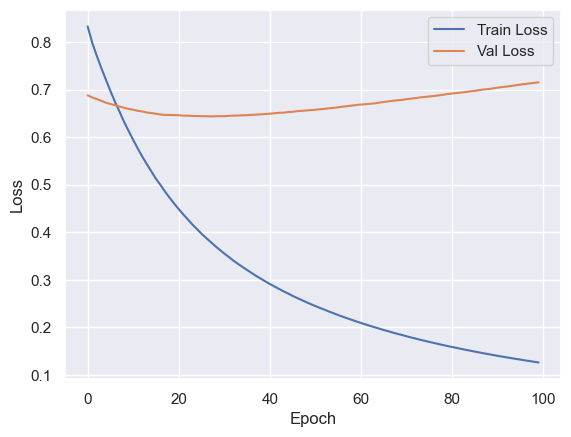

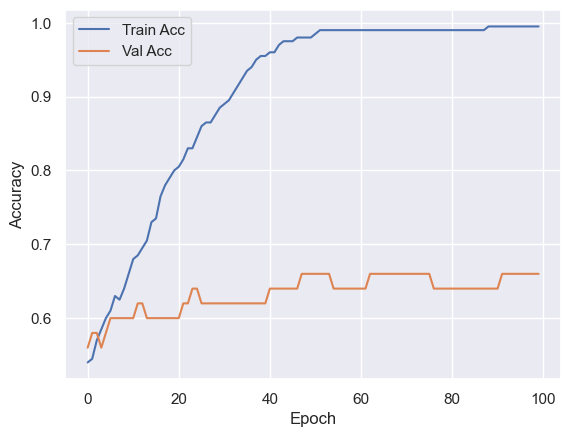

In [ ]:
plot_model(hist)

Large gap between Training and validation means that model is too overfitted

First I've tried with dropout input with rate of 0.1 which was really bad; then with 0.01

In [ ]:
model_do= Sequential()
model_do.add(Dropout(0.01, input_dim = X.shape[1]))
model_do.add(Dense(1, activation ="sigmoid",))
model_do.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\urynb\OneDrive\Рабочий стол\ML_Projects\ml312\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
model_do.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
hist_do = model_do.fit(X, Y, epochs=100, batch_size=40, validation_split=0.2)  

Epoch 1/100


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4400 - loss: 0.9765 - val_accuracy: 0.5400 - val_loss: 0.8562
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4400 - loss: 0.9413 - val_accuracy: 0.5400 - val_loss: 0.8487
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4600 - loss: 0.9139 - val_accuracy: 0.5600 - val_loss: 0.8403
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4700 - loss: 0.8851 - val_accuracy: 0.5600 - val_loss: 0.8322
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4950 - loss: 0.8495 - val_accuracy: 0.5800 - val_loss: 0.8247
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5050 - loss: 0.8274 - val_accuracy: 0.6000 - val_loss: 0.8172
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5200 - loss: 0.7939 - val_accuracy: 0.6000 - val_loss: 0.8099
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5350 - loss: 0.7697 - val_accuracy: 0.6200 - val_loss: 0.8028
Epoc

In [132]:
model_do.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

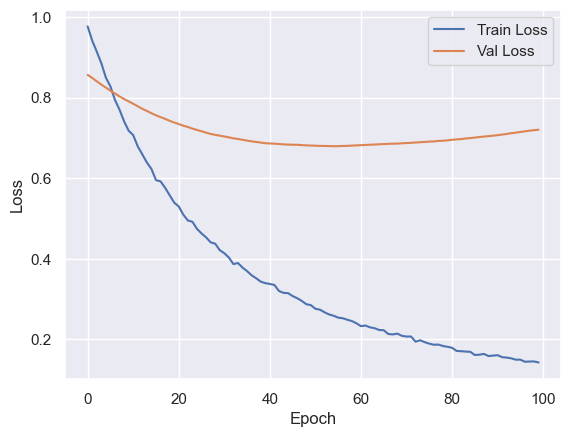

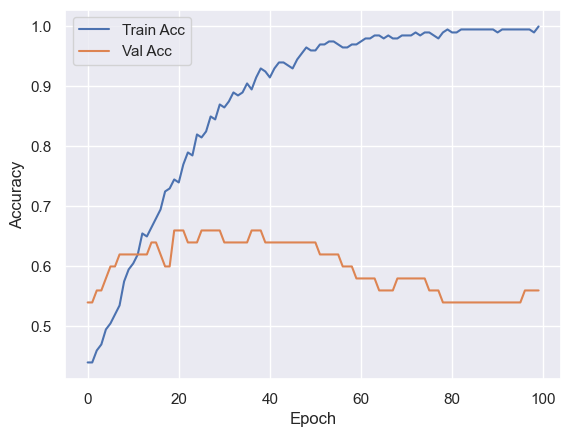

In [133]:
plot_model(hist_do)

### 1 Hidden Layer

In [75]:
del model2

In [76]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=X.shape[1]))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 38,657 (151.00 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
hist2 = model2.fit(X, Y, epochs=100, batch_size=40, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4100 - loss: 0.9242 - val_accuracy: 0.5600 - val_loss: 0.6883
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7500 - loss: 0.5763 - val_accuracy: 0.6400 - val_loss: 0.6511
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8950 - loss: 0.3920 - val_accuracy: 0.7200 - val_loss: 0.6308
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9700 - loss: 0.2750 - val_accuracy: 0.7000 - val_loss: 0.6254
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9850 - loss: 0.2025 - val_accuracy: 0.6600 - val_loss: 0.6245
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1559 - val_accuracy: 0.6600 - val_loss: 0.6270
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1215 - val_accuracy: 0.6600 - val_loss: 0.6307
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0968 - val_accuracy: 0.6600 - val_loss:

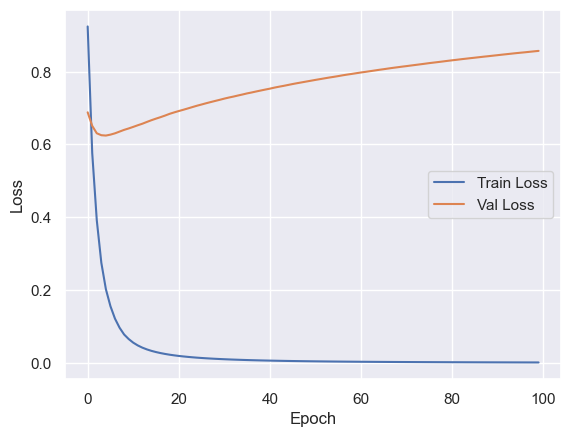

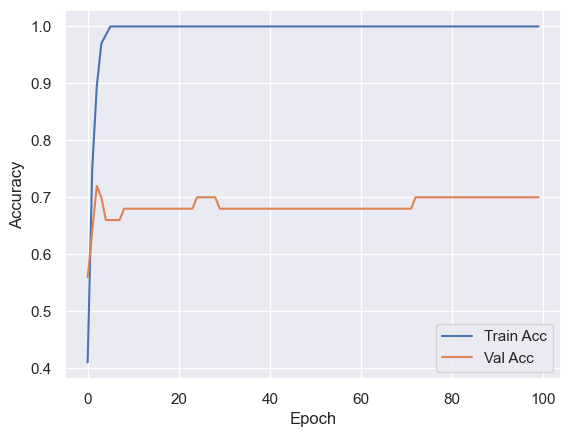

In [78]:
plot_model(hist2)

In [85]:
model2_dr= Sequential()
model2_dr.add(Dense(128, activation='relu', input_dim=X.shape[1]))
model2_dr.add(Dropout(0.375))
model2_dr.add(Dense(1, activation='sigmoid'))
model2_dr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2_dr.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 38,657 (151.00 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
hist2_dr = model2_dr.fit(X, Y, epochs=100, batch_size=40, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5100 - loss: 0.8073 - val_accuracy: 0.5800 - val_loss: 0.6933
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7450 - loss: 0.6083 - val_accuracy: 0.6400 - val_loss: 0.6727
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8400 - loss: 0.4311 - val_accuracy: 0.6800 - val_loss: 0.6617
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8450 - loss: 0.3530 - val_accuracy: 0.6600 - val_loss: 0.6553
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8950 - loss: 0.3066 - val_accuracy: 0.6400 - val_loss: 0.6526
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9400 - loss: 0.2404 - val_accuracy: 0.6000 - val_loss: 0.6497
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9700 - loss: 0.1840 - val_accuracy: 0.6400 - val_loss: 0.6490
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9750 - loss: 0.1599 - val_accuracy: 0.6200 - val_loss:

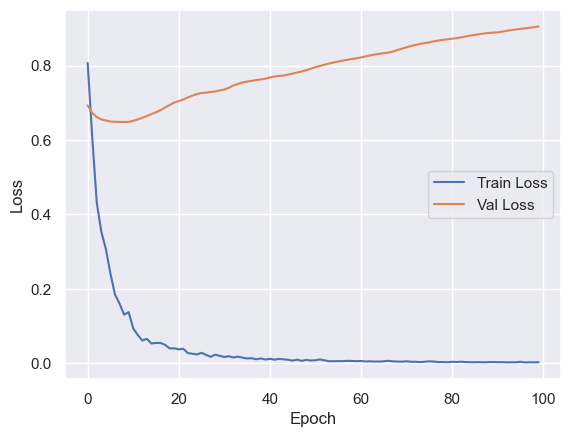

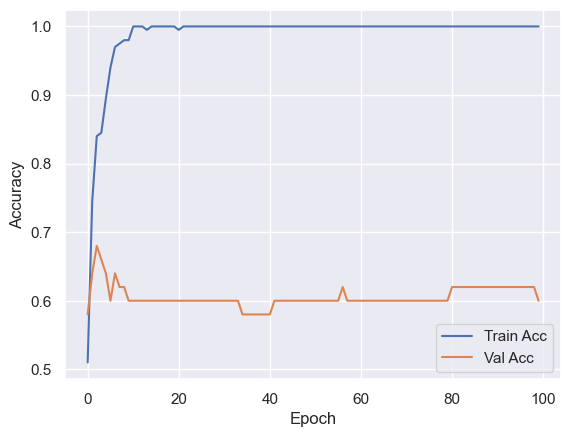

In [87]:
plot_model(hist2_dr)

### 2 Hidden Layers

In [102]:
del model3

In [167]:
from tensorflow.keras import regularizers
l2reg = regularizers.l2(0.001)
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2reg))
model3.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

c:\Users\urynb\OneDrive\Рабочий стол\ML_Projects\ml312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_130 (Dense)               │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,169 (215.50 KB)

 Trainable params: 55,169 (215.50 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
hist3 = model3.fit(X, Y, epochs=100, batch_size=40, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6100 - loss: 2.1544 - val_accuracy: 0.5600 - val_loss: 2.1607
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7550 - loss: 1.8722 - val_accuracy: 0.5800 - val_loss: 2.0501
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9300 - loss: 1.6796 - val_accuracy: 0.5800 - val_loss: 1.9802
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9800 - loss: 1.5345 - val_accuracy: 0.5600 - val_loss: 1.9406
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9950 - loss: 1.4095 - val_accuracy: 0.5600 - val_loss: 1.9022
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 1.3038 - val_accuracy: 0.6200 - val_loss: 1.8593
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 1.2118 - val_accuracy: 0.6400 - val_loss: 1.8021
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 1.1323 - val_accuracy: 0.6400 - val_loss:

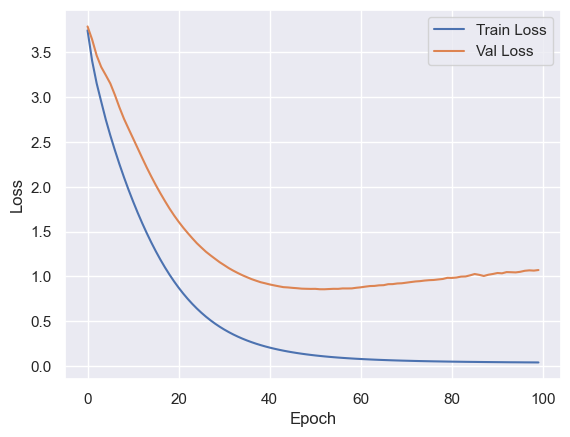

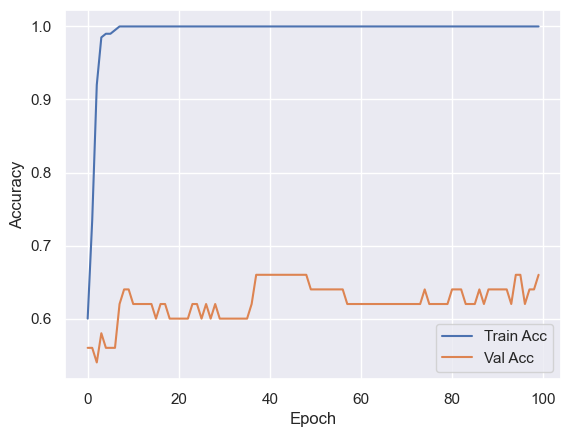

In [129]:
plot_model(hist3)

With dropout

In [196]:
l2reg = regularizers.l2(0.001)
model3_dr = Sequential()
model3.add(Dense(128, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2reg))
model3_dr.add(Dropout(0.3))
model3.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model3_dr.add(Dropout(0.5))
model3_dr.add(Dense(1, activation='sigmoid'))
model3_dr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3_dr.summary()

c:\Users\urynb\OneDrive\Рабочий стол\ML_Projects\ml312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [197]:
hist3_dr = model3_dr.fit(X, Y, epochs=200, batch_size=40, validation_split=0.3)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5143 - loss: 1.1605 - val_accuracy: 0.4933 - val_loss: 0.9015
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4914 - loss: 1.2818 - val_accuracy: 0.5067 - val_loss: 0.8952
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5143 - loss: 1.2022 - val_accuracy: 0.5067 - val_loss: 0.8892
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5771 - loss: 0.9978 - val_accuracy: 0.5067 - val_loss: 0.8832
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4857 - loss: 1.0767 - val_accuracy: 0.5067 - val_loss: 0.8772
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5257 - loss: 1.0981 - val_accuracy: 0.5067 - val_loss: 0.8731
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4914 - loss: 1.0878 - val_accuracy: 0.5067 - val_loss: 0.8680
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5029 - loss: 1.0418 - val_accuracy: 0.4933 - val_loss:

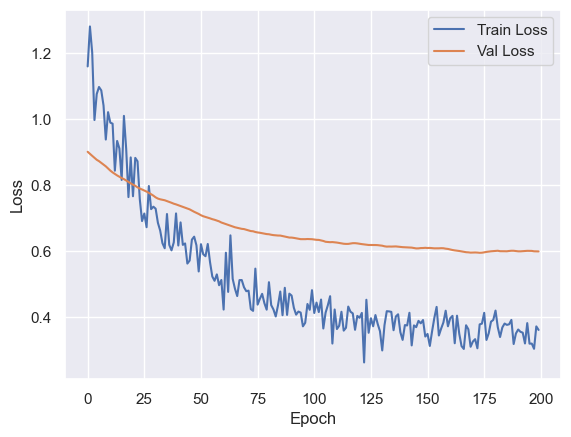

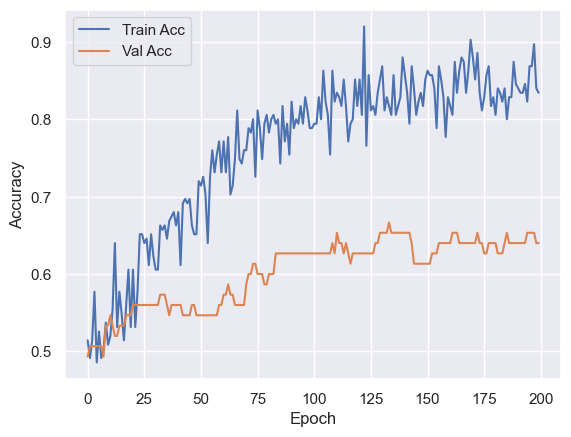

In [198]:
plot_model(hist3_dr)

In [199]:
y_pred = model3_dr.predict(X_test)

618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step


In [ ]:
y_pred = (y_pred > 0.5).astype('int').reshape(-1)


In [202]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(19750,))

In [224]:
# Submission of manual best model with 2 hidden layers
df_submission = pd.DataFrame({
    'id': test_data['id'],
    'target': y_pred
})
df_submission.head()

df_submission.to_csv('./submissions/mlp.csv', index=False)

Private: 0.603
 
Public: 0.643

#### Trying best model with 1 Hidden layer with regularization and dropout

In [158]:
kernel_regularizer = regularizers.l2(0.01)

model2_adj = Sequential()
model2_adj.add(Dense(128, activation='relu', input_dim=X.shape[1], kernel_regularizer='l2'))
model2_adj.add(Dropout(0.3))
model2_adj.add(Dense(1, activation='sigmoid'))
model2_adj.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2_adj.summary()

c:\Users\urynb\OneDrive\Рабочий стол\ML_Projects\ml312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)               │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 38,657 (151.00 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
hist_adj = model2.fit(X, Y, epochs=100, batch_size=40, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0301 - val_accuracy: 0.6400 - val_loss: 1.1289
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0301 - val_accuracy: 0.6600 - val_loss: 1.1218
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0302 - val_accuracy: 0.6600 - val_loss: 1.1037
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 0.6600 - val_loss: 1.1054
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0296 - val_accuracy: 0.6600 - val_loss: 1.1087
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0304 - val_accuracy: 0.6600 - val_loss: 1.1118
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0306 - val_accuracy: 0.6600 - val_loss: 1.1225
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0303 - val_accuracy: 0.6600 - val_loss:

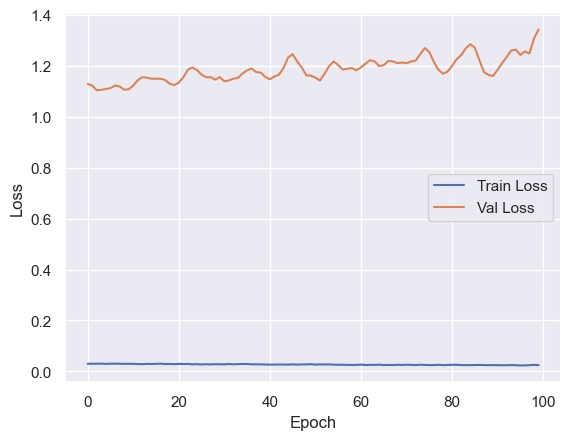

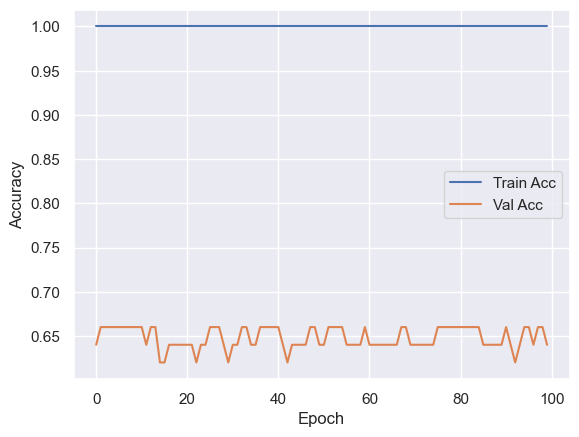

In [160]:
plot_model(hist_adj)

### Below keras-tuner, which tries different width, depth, reg, dropout and so on by chatGPT

In [226]:
import numpy as np
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from pathlib import Path

BASE = Path(r"C:/ML/tuner_results")
BASE.mkdir(parents=True, exist_ok=True)


def build_model(hp: kt.HyperParameters):
    # Search depth: 1–4 hidden layers
    num_layers = hp.Int('num_layers', 1, 5)

    # Global regularization choice
    l2_val = hp.Float('l2', 1e-4, 5e-2, sampling='log')
    l2reg = regularizers.l2(l2_val)

    model = Sequential()

    # First layer (needs input_dim)
    units0 = hp.Int('units_0', min_value=32, max_value=256, step=32)
    model.add(Dense(units0, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2reg))
    if hp.Boolean('dropout_0'):
        model.add(Dropout(hp.Float('drop_rate_0', 0.1, 0.6, step=0.1)))

    # Additional hidden layers
    for i in range(1, num_layers):
        units_i = hp.Int(f'units_{i}', min_value=32, max_value=256, step=32)
        model.add(Dense(units_i, activation='relu', kernel_regularizer=l2reg))
        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(hp.Float(f'drop_rate_{i}', 0.1, 0.6, step=0.1)))

    # Output
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer / LR
    lr = hp.Float('lr', 1e-4, 5e-3, sampling='log')
    opt = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    hp.Choice('batch_size', [16, 32, 40, 64])
    return model

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=25,                # try ~25 different configs
    executions_per_trial=1,       # set >1 to average multiple runs
    directory=str(BASE),
    project_name='mlp_binary',
    overwrite=True   
)

early = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# You can also pass validation_data=(X_val, y_val) instead of validation_split to avoid leakage.
tuner.search(
    X.astype('float32'),
    Y.astype('float32'),
    epochs=200,
    validation_split=0.3,
    callbacks=[early],
    verbose=1
)

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
for k,v in best_hp.values.items():
    print(k, "=", v)

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 25 Complete [00h 00m 25s]
val_accuracy: 0.7333333492279053

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 00h 04m 33s
Best hyperparameters:
num_layers = 4
l2 = 0.005883469556341569
units_0 = 224
dropout_0 = True
lr = 0.0029614733748536824
batch_size = 16
drop_rate_0 = 0.30000000000000004
units_1 = 256
dropout_1 = False
units_2 = 160
dropout_2 = False
units_3 = 32
dropout_3 = False
units_4 = 160
dropout_4 = True
drop_rate_1 = 0.1
drop_rate_3 = 0.2
drop_rate_2 = 0.2


c:\Users\urynb\OneDrive\Рабочий стол\ML_Projects\ml312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 224)            │        67,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        41,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,329 (669.25 KB)

 Trainable params: 171,329 (669.25 KB)

 Non-trainable params: 0 (0.00 B)

In [227]:
best_hp.values

{'num_layers': 4,
 'l2': 0.005883469556341569,
 'units_0': 224,
 'dropout_0': True,
 'lr': 0.0029614733748536824,
 'batch_size': 16,
 'drop_rate_0': 0.30000000000000004,
 'units_1': 256,
 'dropout_1': False,
 'units_2': 160,
 'dropout_2': False,
 'units_3': 32,
 'dropout_3': False,
 'units_4': 160,
 'dropout_4': True,
 'drop_rate_1': 0.1,
 'drop_rate_3': 0.2,
 'drop_rate_2': 0.2}

In [217]:
best_model_reinit = tuner.hypermodel.build(best_hp)
best_model_reinit.summary()

c:\Users\urynb\OneDrive\Рабочий стол\ML_Projects\ml312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 224)            │        67,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,329 (356.75 KB)

 Trainable params: 91,329 (356.75 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
# Refit best model on all data if you want final training:
best_hist2 = best_model_reinit.fit(X.astype('float32'), Y.astype('float32'),
               epochs=200, batch_size=best_hp.get('batch_size'),
               validation_split=0.2, verbose=1)

Epoch 1/200


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0628 - val_accuracy: 0.7000 - val_loss: 0.9743
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0630 - val_accuracy: 0.6800 - val_loss: 0.9697
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0616 - val_accuracy: 0.6800 - val_loss: 0.9458
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0606 - val_accuracy: 0.6800 - val_loss: 0.8795
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0591 - val_accuracy: 0.6800 - val_loss: 0.8992
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0590 - val_accuracy: 0.6600 - val_loss: 0.9770
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0575 - val_accuracy: 0.6600 - val_loss: 0.9981
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0561 - val_accuracy: 0.6800 - val_loss: 0

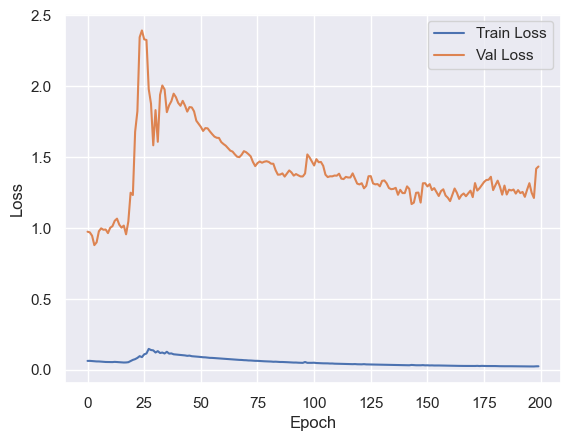

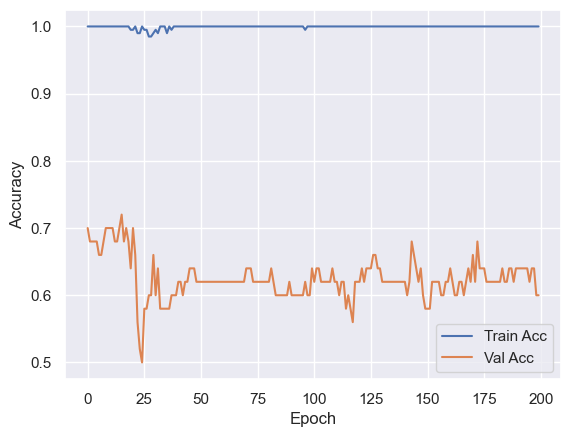

In [229]:
plot_model(best_hist2)

In [222]:
y_pred_with_tuner = best_model_reinit.predict(X_test)
y_pred_w = (y_pred_with_tuner > 0.5).astype('int').reshape(-1)

618/618 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


In [223]:
y_pred_w

array([1, 0, 1, ..., 1, 1, 1], shape=(19750,))

In [225]:
# Submission of manual best model with 2 hidden layers
df_submission_tuner = pd.DataFrame({
    'id': test_data['id'],
    'target': y_pred_w
})

df_submission_tuner.to_csv('./submissions/mlp_tuner.csv', index=False)

Public: 0.643

Private: 0.603